<a href="https://colab.research.google.com/github/pankajbhoitebpr/Poject6_Alabone/blob/master/Project_40_FE_students_survey_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Year Engineering  Students Survey Part 1

This is the data set of first year engineering students form one of the reputed institute of Technology.

Introduction:I am Pankaj Bhoite and today I am going to make Exploratory Data Analysis and basic Prediction model based on classification method of following problem:

1.Problem Definition-Engineering is one of the best Professional course of Education,but currently so many institute are facing 
problems related to the Admission.From this survey we are trying to find out the problem of student on the basis of some questionaries e.g,what is the expectation from colleges,why you choose the institute,why your friends  did not select,from where you get the information about the institute,Dislike,whether satified from college facility Yes or not.
I have divided this work in two parts in the first part i will apply Exploratory Data Analysis(EDA) in second part try to applying some Algorithm
From this Analysis we make Prediction Model of the given data set to predict whether the students are satisfied from college Facility or not. 

Today we are going to work on a dataset which consists of information about the newly admitted students survey of engineering college whether they satisfied and from college or not,CET score and other aspects such as PCM score etc.When we work on these sort of data ,we need to see which column is important for us and which is not.Our main aim today is to make a model which can give us good prediction on whether current students are satisfied or need to improvement, because if they are satisfied then ultimately admission would be improved next time so its need to very important to make a model which can gives good prediction on the students survey.We are going to use Logistic Regression for this dataset and see if it gives us a good accuracy or not.


First we import our libraries and  dataset and then we see the head of the data to know how the data looks like and use describe function to see the percentile’s and other key statistics.



Importing the Library

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
#uploading the .csv file
df=pd.read_csv('FE_std_survey.csv')
df.head()#displaying first five rows

,Timestamp,Class,Branch,PCM marks(Out of 300),CET Score,JEE score,why chose college,Reason for not selecting anyone,Dislikes,State,Satisfied from College
0,1-30-2018 10:04:23,FE,Electrical Engineering,259,92,21,"Placement, Top in North Maharashtra Region, Yo...",Fee Issue,No curriculum activity's in college,Maharashtra,YES
1,1-30-2018 19:00:00,F E,Mechanical Engineering,185,72,24,"Result, Placement, Your relative/senior sugges...","Fee Issue, any other then specify",1 - The practical sessions are not take seriou...,Maharashtra,YES
2,1-29-2018 22:58:37,FE,"Mechanical Engineering, Electronics and Teleco...",188,60,0,Teaching Facility,Rural area,Nothing,Maharashtra,YES
3,1-31-2018 15:49:43,F E,Mechanical Engineering,169,51,35,Your relative/senior suggested,Placement,Nothing,Maharashtra,YES
4,1-29-2018 15:05:28,FE,Computer Engineering,182,60,0,"Placement, Teaching Facility, Infrastructure",Fee Issue,Nothing,Maharashtra,YES


Details About the Dataset:

As mentioned earlier the data is coming from the survey from existing First engineering students explanation of Attributes are follwing-


Timestamp-This is the time details when student has submitted the survey.

Class-Class of students.

for security purpose Name of students and college name not displayed.

Branch-Stream of engineering 

PCM -This is group of Physics ,chemistry and Mathematics.

CET -Student get score in Common Entrance Test

Jee-Score of Jee entrance exam.

Now list of Questions

why choose this college

Reasons why your friends not choose this college,

Dislike-Any dislike of college,Area where improvement needed

state -belongs to which state get the information about the state
Satisfied from college-Yes/No

In [0]:
df.tail()#for showing the last five rows in dataset

,Timestamp,Class,Branch,PCM marks(Out of 300),CET Score,JEE score,why chose college,Reason for not selecting anyone,Dislikes,State,Satisfied from College
137,1-25-2018 13:47:53,F E,Mechanical Engineering,213,62,0,"Placement, Top in North Maharashtra Region, Te...",Fee Issue,NO,Maharashtra,YES
138,1-25-2018 13:51:42,FE,Mechanical Engineering,232,61,21,"Result, Placement, Top in North Maharashtra Re...",Fee Issue,NOTHING,Maharashtra,YES
139,1-25-2018 13:46:49,F E,Mechanical Engineering,60,60,10,Infrastructure,any other then specify,Nothing,Maharashtra,YES
140,1-25-2018 13:50:56,FE,Mechanical Engineering,180,60,0,"Placement, Top in North Maharashtra Region, Yo...",Fee Issue,no,Maharashtra,YES
141,1-30-2018 14:25:21,F E,Computer Engineering,200,0,0,"Placement, Top in North Maharashtra Region, In...",Fee Issue,Nothing,Maharashtra,YES


In [0]:
df.isnull().sum()# for displaying the null values

Timestamp                          0
Class                              0
Branch                             0
PCM marks(Out of 300)              0
CET Score                          0
JEE score                          0
why chose college                  0
Reason for not selecting anyone    0
Dislikes                           0
State                              0
Satisfied from College             0
dtype: int64

good news no null values inside the datasets.

In [0]:
df.info() #displaying information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 11 columns):
Timestamp                          142 non-null object
Class                              142 non-null object
Branch                             142 non-null object
PCM marks(Out of 300)              142 non-null int64
CET Score                          142 non-null int64
JEE score                          142 non-null int64
why chose college                  142 non-null object
Reason for not selecting anyone    142 non-null object
Dislikes                           142 non-null object
State                              142 non-null object
Satisfied from College             142 non-null object
dtypes: int64(3), object(8)
memory usage: 12.3+ KB


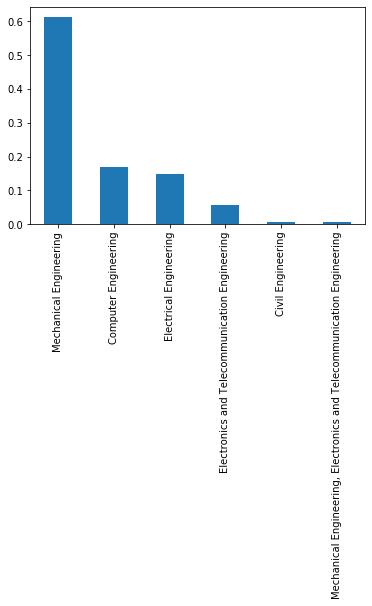

In [0]:
df.Branch.value_counts(normalize=True).plot(kind='bar');

So here we can see that 60% students selecting Mechanical Branch,18%arround chose Computer and 15% has choosen E&TC.


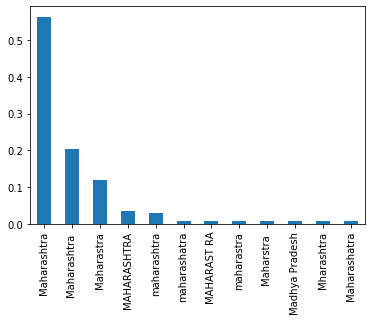

In [0]:
df.State.value_counts(normalize=True).plot(kind='bar');

The will be located in Maharastra more then 98% students are belongs to Maharastra and arrund 2% from MadhyaPradesh

In [0]:
df["why chose college"]=df["why chose college"].str.split(",")
df["why chose college"]=df["why chose college"].str[0]
df.head(2)

,Timestamp,Class,Branch,PCM marks(Out of 300),CET Score,JEE score,why chose college,Reason for not selecting anyone,Dislikes,State,Satisfied from College
0,1-30-2018 10:04:23,FE,Electrical Engineering,259,92,21,Placement,Fee Issue,No curriculum activity's in college,Maharashtra,YES
1,1-30-2018 19:00:00,F E,Mechanical Engineering,185,72,24,Result,"Fee Issue, any other then specify",1 - The practical sessions are not take seriou...,Maharashtra,YES


In [0]:
df["Reason for not selecting anyone"]=df["Reason for not selecting anyone"].str.split(",")
df["Reason for not selecting anyone"]=df["Reason for not selecting anyone"].str[0]
df.head(2)

,Timestamp,Class,Branch,PCM marks(Out of 300),CET Score,JEE score,why chose college,Reason for not selecting anyone,Dislikes,State,Satisfied from College
0,1-30-2018 10:04:23,FE,Electrical Engineering,259,92,21,Placement,Fee Issue,No curriculum activity's in college,Maharashtra,YES
1,1-30-2018 19:00:00,F E,Mechanical Engineering,185,72,24,Result,Fee Issue,1 - The practical sessions are not take seriou...,Maharashtra,YES


In [0]:
df["Dislikes"]=df["Dislikes"].str.split(",")
df["Dislikes"]=df["Dislikes"].str[0]
df.head(2)

,Timestamp,Class,Branch,PCM marks(Out of 300),CET Score,JEE score,why chose college,Reason for not selecting anyone,Dislikes,State,Satisfied from College
0,1-30-2018 10:04:23,FE,Electrical Engineering,259,92,21,Placement,Fee Issue,No curriculum activity's in college,Maharashtra,YES
1,1-30-2018 19:00:00,F E,Mechanical Engineering,185,72,24,Result,Fee Issue,1 - The practical sessions are not take seriou...,Maharashtra,YES


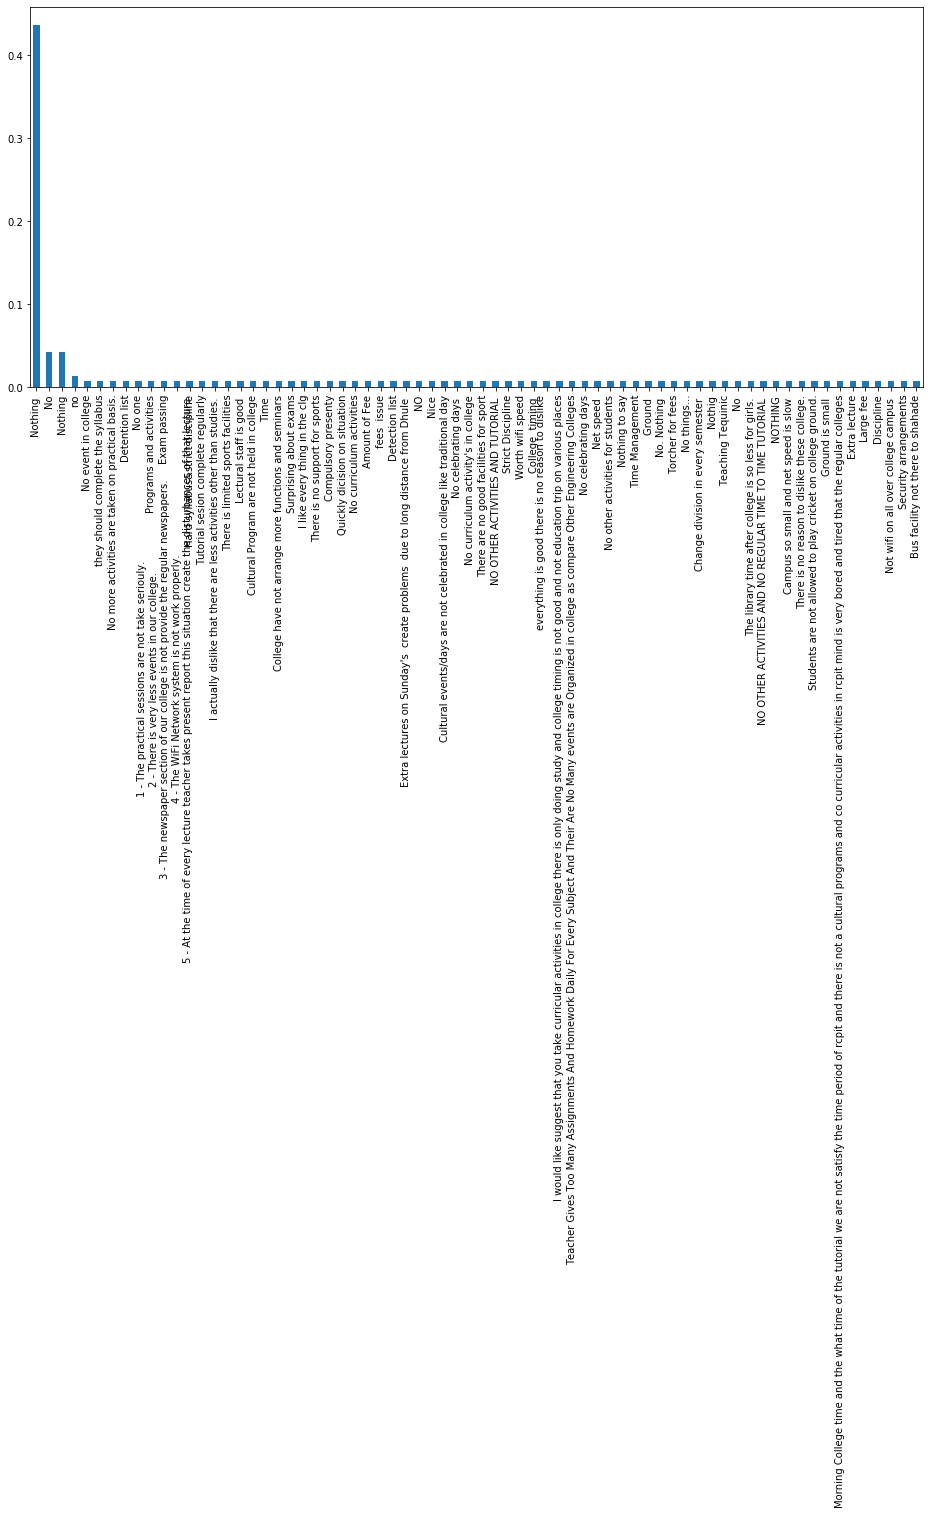

In [0]:
df.Dislikes.value_counts(normalize=True).plot(kind='bar',figsize=(16,7));

Here we can see that the 50% students doesnt have any problems but some of have issues out of those most 
common issues is related to the (1)No Extracurricular Activities held in the school(2)college time is too much
(3)Practical sessioned no taken seriously
College should be work on the issues.


In [0]:

df["why_choose"]=df["why chose college"]
df["why chose college"]=df["why chose college"]
df.head(2)

,Timestamp,Class,Branch,PCM marks(Out of 300),CET Score,JEE score,why chose college,Reason for not selecting anyone,Dislikes,State,Satisfied from College,why_choose
0,1-30-2018 10:04:23,FE,Electrical Engineering,259,92,21,Placement,Fee Issue,No curriculum activity's in college,Maharashtra,YES,Placement
1,1-30-2018 19:00:00,F E,Mechanical Engineering,185,72,24,Result,Fee Issue,1 - The practical sessions are not take seriou...,Maharashtra,YES,Result


Here the name of column-why college chose attribute is too long so we need to change name of column  new name we have to write 
why_choose

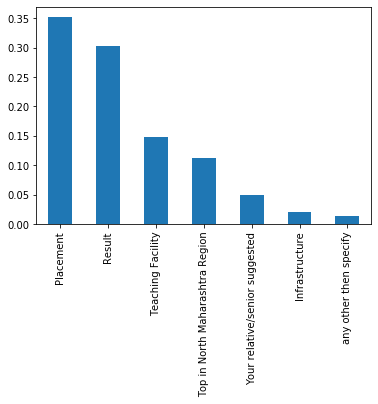

In [0]:
df.why_choose.value_counts(normalize=True).plot(kind='bar');

So here we can see that the most of the students opted the college due to the Placement-35%,Result-30%,Tecahing-15%

In [0]:
df.drop('why chose college',axis=1,inplace=True)


In [0]:
#Need to change name of column of Reason for not select any one
df["Reason_not_select"]=df["Reason for not selecting anyone"]
df["Reason for not selecting anyone"]=df["Reason for not selecting anyone"]
df.head(2)


,Timestamp,Class,Branch,PCM marks(Out of 300),CET Score,JEE score,Reason for not selecting anyone,Dislikes,State,Satisfied from College,why_choose,Reason_not_select
0,1-30-2018 10:04:23,FE,Electrical Engineering,259,92,21,Fee Issue,No curriculum activity's in college,Maharashtra,YES,Placement,Fee Issue
1,1-30-2018 19:00:00,F E,Mechanical Engineering,185,72,24,Fee Issue,1 - The practical sessions are not take seriou...,Maharashtra,YES,Result,Fee Issue


In [0]:
#we already rename this column need to remove it.
df.drop('Reason for not selecting anyone',axis=1,inplace=True)
df.head(2)

,Timestamp,Class,Branch,PCM marks(Out of 300),CET Score,JEE score,Dislikes,State,Satisfied from College,why_choose,Reason_not_select
0,1-30-2018 10:04:23,FE,Electrical Engineering,259,92,21,No curriculum activity's in college,Maharashtra,YES,Placement,Fee Issue
1,1-30-2018 19:00:00,F E,Mechanical Engineering,185,72,24,1 - The practical sessions are not take seriou...,Maharashtra,YES,Result,Fee Issue


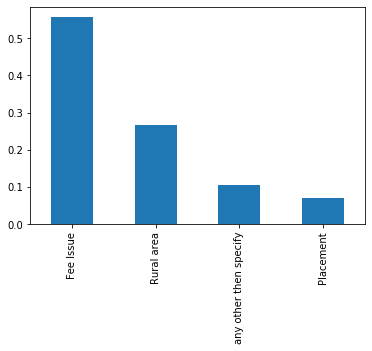

In [0]:
df.Reason_not_select.value_counts(normalize=True).plot(kind='bar');

Now we can see that Arround 55% says that their frinds not taken the Admission due to Fee Issue.

Arround 25% students says that due to College located at Remot/Rural place.
This is very important in our analysis and also for the college also to know about the why some of students not take admission.


Now we change the column name Satisfied from college we rename it"satisfied_college"

This is very important Attribute to our analysis this is the output variable.

whether  students are satisfied or not?

In [0]:
df["satisfied_college"]=df["Satisfied from College"]
df["Satisfied from College"]=df["Satisfied from College"]
df.drop('Satisfied from College',axis=1,inplace=True)

df.head(2)

,Timestamp,Class,Branch,PCM marks(Out of 300),CET Score,JEE score,Dislikes,State,why_choose,Reason_not_select,satisfied_college
0,1-30-2018 10:04:23,FE,Electrical Engineering,259,92,21,No curriculum activity's in college,Maharashtra,Placement,Fee Issue,YES
1,1-30-2018 19:00:00,F E,Mechanical Engineering,185,72,24,1 - The practical sessions are not take seriou...,Maharashtra,Result,Fee Issue,YES


Now lets check the percentage of students satisfied from college or not

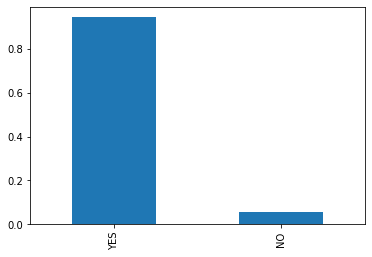

In [0]:
df.satisfied_college.value_counts(normalize=True).plot(kind='bar');

Now that is very important conclusion here 88% arrund students say Yes means they are Satified from colleges 
exercise.

satisfied_college                                   NO  YES  All
Branch                                                          
Civil Engineering                                    0    1    1
Computer Engineering                                 1   23   24
Electrical Engineering                               1   20   21
Electronics and Telecommunication Engineering        0    8    8
Mechanical Engineering                               6   81   87
Mechanical Engineering, Electronics and Telecom...   0    1    1
All                                                  8  134  142


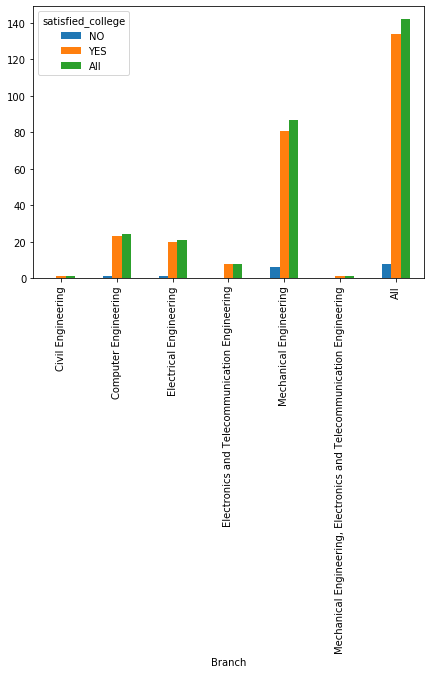

In [0]:
#Branch vs Satisfied from college filter
print(pd.crosstab(df.Branch,df.satisfied_college,margins=True))
pd.crosstab(df.Branch,df.satisfied_college,margins=True).plot(kind='bar',figsize=(7,5));

In [0]:
#for size of dataset
df.shape

(142, 11)

In [0]:
df.describe()#It shows the description of data

,PCM marks(Out of 300),CET Score,JEE score
count,142.000000,142.000000,142.000000
mean,182.380282,66.612676,19.401408
std,49.034903,20.853371,19.263039
min,40.000000,0.000000,-8.000000
25%,166.000000,59.000000,0.000000
50%,190.500000,65.000000,16.000000
75%,215.000000,74.000000,31.500000
max,259.000000,124.000000,77.000000


What can we infer from the above describe function?
1.	Look at the Satisfaction column ,the data set has in the form of Yes and No and would be interesting to know more about it as we progress.
2.Maximum value of PCM score is 259 out of 300.
all this columns-"PCM Marks","CET Score","Jee" scores it is the variables shows the quality of student.

All the numerical attributes showing the input variables,here we want to know about the existaence students 
are satified or not from college.
So we need output variable.


so first of all we will have to replace this categorical data "Yes" -1 and "No"-0


Now , we are going to see some visualization and also going to see how and what can we infer from visualization

Lets start Exploratory Data Analysis EDA

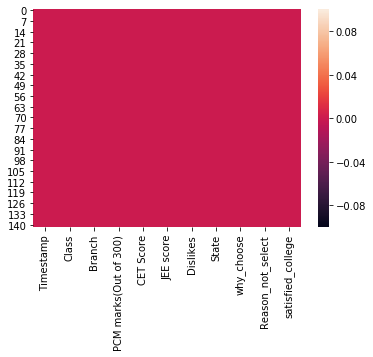

In [0]:
sns.heatmap(df.isnull())

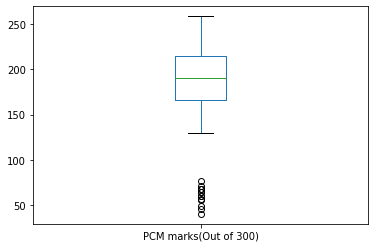

In [0]:
df['PCM marks(Out of 300)'].plot.box()
# displaying outliers

 visualization ,through box plot
 from the plot we can see that outliers are present it could be affect in our result of accuracy.

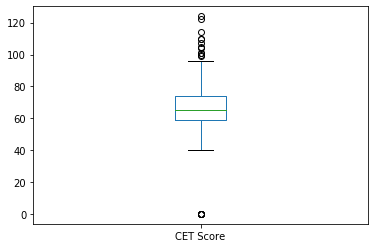

In [0]:
df['CET Score'].plot.box()

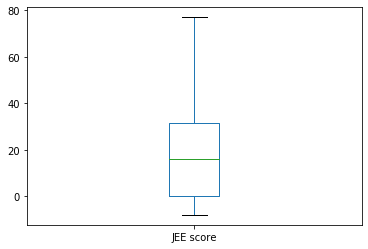

In [0]:
df['JEE score'].plot.box()

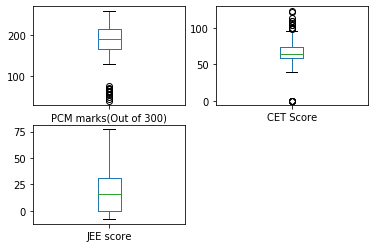

In [0]:
df.plot(kind='box',subplots=True,layout=(2,2))
plt.show()

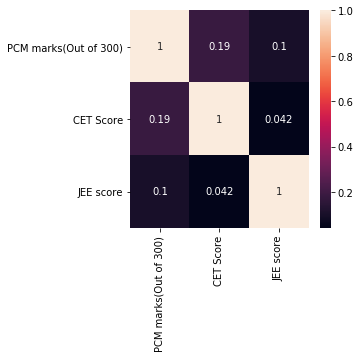

In [0]:
corr_hmap=df.corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr_hmap,annot=True)
plt.show()

from the data we can say no strong between correlation between input and output varables

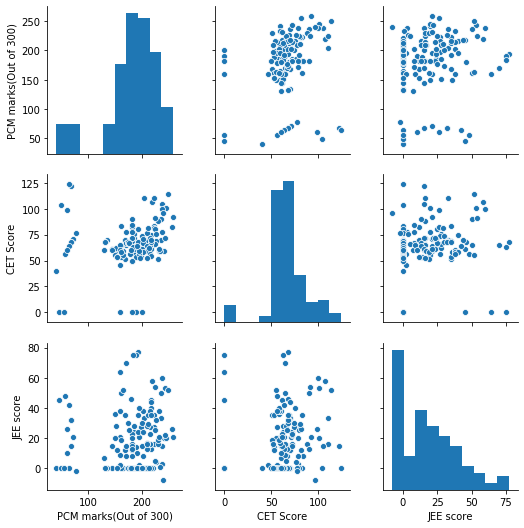

In [0]:
sns.pairplot(df)

From sns plot here we can see the data is too much spreaded

As we can see from all the above representation that many factors are are affecting the satisfaction of students,like PCM scores,JEE score because fro Box plot we are getting outliers and also in the  correlation_hmap plot we did not get any strong correlation between input and outliers.

In [0]:
df.drop('Timestamp',axis=1,inplace=True)

In [0]:
num_val={'YES':1,'NO':0}#replace yes and No to 1 and 0 
df['satisfied_college']=df["satisfied_college"].apply(lambda x:num_val[x])

df.head()
#Satisfied from College this is output variable

,Class,Branch,PCM marks(Out of 300),CET Score,JEE score,Dislikes,State,why_choose,Reason_not_select,satisfied_college
0,FE,Electrical Engineering,259,92,21,No curriculum activity's in college,Maharashtra,Placement,Fee Issue,1
1,F E,Mechanical Engineering,185,72,24,1 - The practical sessions are not take seriou...,Maharashtra,Result,Fee Issue,1
2,FE,"Mechanical Engineering, Electronics and Teleco...",188,60,0,Nothing,Maharashtra,Teaching Facility,Rural area,1
3,F E,Mechanical Engineering,169,51,35,Nothing,Maharashtra,Your relative/senior suggested,Placement,1
4,FE,Computer Engineering,182,60,0,Nothing,Maharashtra,Placement,Fee Issue,1


4.Pre-processing Pipeline
we have to define the attributes for traing and testing the data

In [0]:
df=pd.get_dummies(df)#need to convert categorical data into numerical value
df.head(2)

,PCM marks(Out of 300),CET Score,JEE score,satisfied_college,Class_F E,Class_FE,Branch_Civil Engineering,Branch_Computer Engineering,Branch_Electrical Engineering,Branch_Electronics and Telecommunication Engineering,...,why_choose_Placement,why_choose_Result,why_choose_Teaching Facility,why_choose_Top in North Maharashtra Region,why_choose_Your relative/senior suggested,why_choose_any other then specify,Reason_not_select_Fee Issue,Reason_not_select_Placement,Reason_not_select_Rural area,Reason_not_select_any other then specify
0,259,92,21,1,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,185,72,24,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

In [0]:
#Defining the x variables we need only numerical Attributes
X = df.drop("satisfied_college",axis=1)
y = df["satisfied_college"]
# Encoding
enc = OrdinalEncoder()
X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [0]:
#Importing the trsin and test library
import sklearn
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.22,random_state=45)

# 5.Building Machine Learning Models



The main objective of this project to identify the most responsive of satisfaction of students from colleges if we get answer in No then it is needful to provide facility to students. So that colleges can improve their admission.
To Achieve this objective, classification algorithm will be employed by analyzing Students statistics , a classification model will do built to classify all clients into two groups yes to Satisfy No to Unsatisfied.


In [0]:
from sklearn.linear_model import LogisticRegression #out variable is not continuous so we have to take Logistic Regressor

from sklearn.metrics import accuracy_score#displaying Accuracy Score
from sklearn.metrics import confusion_matrix,classification_report#Displaying Confusion Matrix

from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

Four different classification algorithms (Logistic Regression, K-Neighbors Classifier, Decision Tree Classifier, and Gaussian NB) are run on the dataset and the best-performing one will be used to build the classification model.

In [0]:
#Lets start Model making Logistic Regression
lr=LogisticRegression()

In [0]:
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
predlr=lr.predict(X_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.90625
[[ 0  3]
 [ 0 29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.91      1.00      0.95        29

    accuracy                           0.91        32
   macro avg       0.45      0.50      0.48        32
weighted avg       0.82      0.91      0.86        32



So from Logistic Regression we get 90% Accuracy so we can say the students are Satisfied after taking the Admission in college.
lets use some other Algorithm


In [0]:
#From DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [0]:
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
preddt=dt.predict(X_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.90625
[[ 0  3]
 [ 0 29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.91      1.00      0.95        29

    accuracy                           0.91        32
   macro avg       0.45      0.50      0.48        32
weighted avg       0.82      0.91      0.86        32



So here we get 90% Accuracy from Support Vector and DecisionTree Classifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)
predgbc=gbc.predict(X_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))

print(classification_report(y_test,predgbc))

0.90625
[[ 0  3]
 [ 0 29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.91      1.00      0.95        29

    accuracy                           0.91        32
   macro avg       0.45      0.50      0.48        32
weighted avg       0.82      0.91      0.86        32



In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
parameters=[{'C':[1,10,100],'kernel':['linear']},
            {'C':[1,10,100],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(estimator=classifier,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1)
grid_search=grid_search.fit(X_train,y_train)

In [0]:
accuracy=grid_search.best_score_

In [0]:
accuracy

0.9545454545454546

95.45% Accuracy score

Comparision of Algorithm
Name of Algorithm       Accuracy Score
LogisticRegression            90%
DecisionTreeClassifier         90%
GridSearchCV                   95%


Conclusion and Recommendations-

The main objective of this project is to increase the effectiveness of the admission scenario of Engineering Colleges,which was successfully met through data analysis ,visualization and analytical model building.A target customer profile established while classification and regression models were Built to predict students response to the improvement of college facility.


From after applying all algorithm we can see that Grid SearchCV is producing best Accuracy Score.
This is the biggest problems in engineering colleges regarding Admission,because now a 

days engineering colleges also not maintain there basic requirement e.g teacher students ratio,Updated Laboratory,
Research facility,placement .


# Some Important Conclusion
(1)From Above Analysis we can say that in the exisisting students from college are satisfied from college.

(2)But there friends not taken Admissions becasue of Fee Issues and College located at Remote place.

(3)The exisisting students not happy certain Activities like Practical not conducted seriously,No Extra curricular Activities 
done in college and the College Timing is too much.

I thought if the exisisting students from college are happy then college didnt get any difficulties to Admission.

So college need improve where they are laging.
(5) Students taken admission due to placement and Result so college need to Focus on these points.